In [264]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
url = "G:/download/bank-data/bank-data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [266]:
# Data preprocessing

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

In [267]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Separate features (X) and target variable (y)
X = df.drop('y', axis=1)
y = df['y']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [269]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

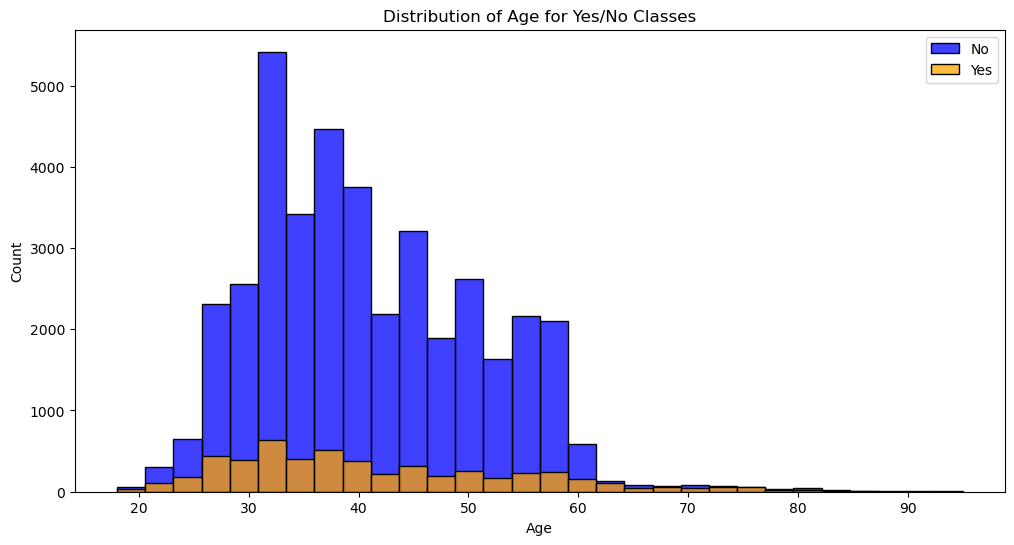

In [270]:
# Create bar chart
plt.figure(figsize=(12, 6))
sns.histplot(df[df['y'] == 0]['age'], color='blue', label='No', kde=False, bins=30)
sns.histplot(df[df['y'] == 1]['age'], color='orange', label='Yes', kde=False, bins=30)
plt.title('Distribution of Age for Yes/No Classes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

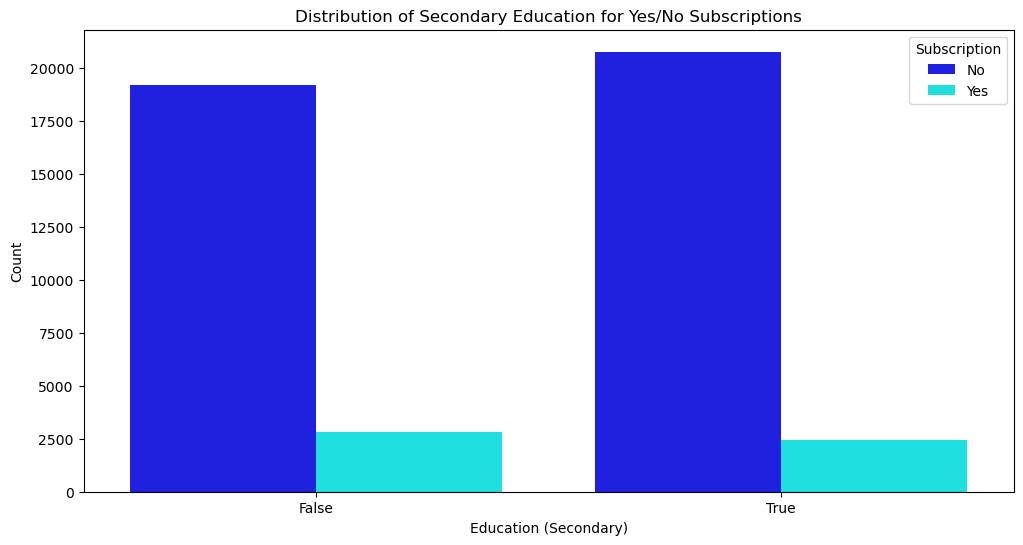

In [271]:
# Assuming df is your DataFrame after standardization
plt.figure(figsize=(12, 6))
sns.countplot(x='education_secondary', hue='y', data=df, palette={0: 'blue', 1: 'aqua'})
plt.title('Distribution of Secondary Education for Yes/No Subscriptions')
plt.xlabel('Education (Secondary)')
plt.ylabel('Count')
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.show()



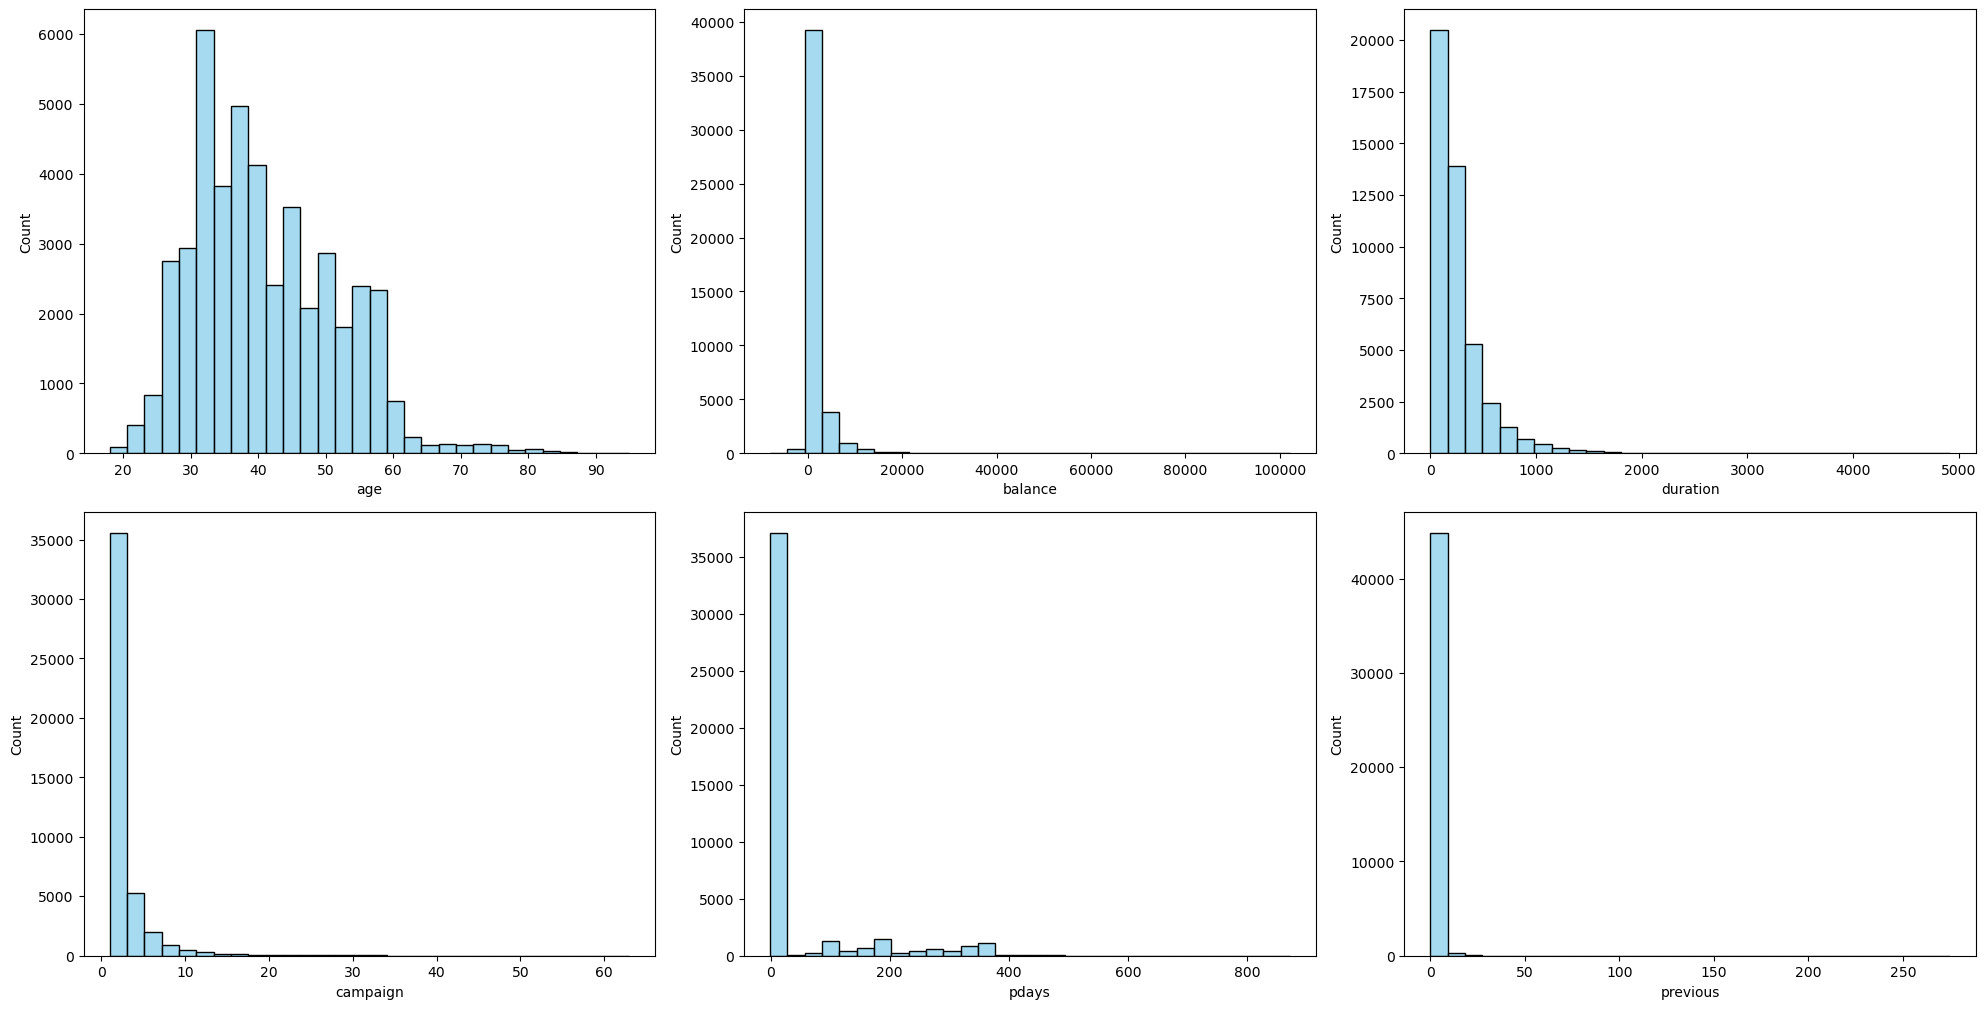

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming continuous_features is a list of column names containing continuous features
# Replace this with the actual list of continuous features in your dataset
continuous_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1

for continuous_feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.histplot(df[continuous_feature], kde=False, bins=30, color='skyblue')
    plt.xlabel(continuous_feature)
    plotnumber += 1

plt.tight_layout()
plt.show()



In [273]:
print(df.columns)




Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [274]:
# Build and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [275]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [276]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [277]:
# Display the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8987061815769103
Confusion Matrix:
[[7755  197]
 [ 719  372]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



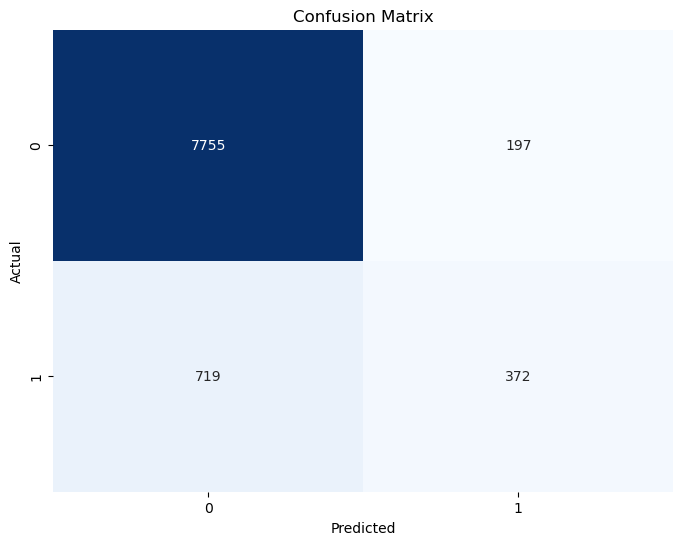

In [278]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()